In [43]:
import numpy as np
import pandas as pd
import cv2
import keras
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt
import os

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Rescaling
from keras.optimizers import SGD
from keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNet, VGG16, ResNet50

import tensorflow as tf

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report ,confusion_matrix
from sklearn.model_selection import train_test_split


In [2]:
def visualize_report(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [3]:
# train_folder = "C:/Users/vsscr/OneDrive/Desktop/avn/cap2/chestCTdata/train"
train_folder = "C:/Users/vsscr/OneDrive/Desktop/avn/cap2/chestCTdata/train"
valid_folder = "C:/Users/vsscr/OneDrive/Desktop/avn/cap2/chestCTdata/valid"
test_folder = "C:/Users/vsscr/OneDrive/Desktop/avn/cap2/chestCTdata/test"


In [4]:
# train_batch_size=32
# valid_batch_size=32
# test_batch_size=32
batch_size=32
# img_height, img_width = (180, 180)
img_height, img_width = (256, 256)


In [5]:
train_ds = image_dataset_from_directory(
    train_folder,
    image_size=(img_height, img_width),
    batch_size=batch_size)



Found 613 files belonging to 4 classes.


In [6]:
train_ds.class_names

['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

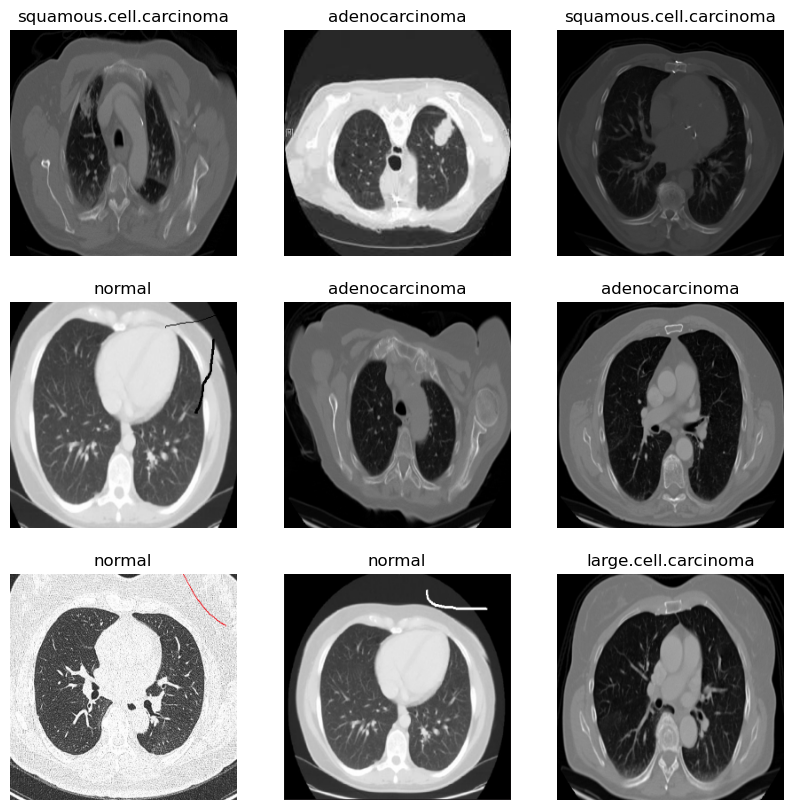

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")


In [8]:
val_ds = image_dataset_from_directory(
  valid_folder,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds.class_names

Found 72 files belonging to 4 classes.


['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

In [9]:
test_ds = image_dataset_from_directory(
  test_folder,
    image_size=(img_height, img_width),
    batch_size=batch_size)


test_ds.class_names

Found 315 files belonging to 4 classes.


['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 256, 256, 3)
(32,)


In [17]:
normalization_layer = Rescaling(1./255)
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


In [11]:
num_classes = len(train_ds.class_names)
# eval_metrics=['accuracy', 'recall', 'percision']
# eval_metrics=['accuracy', 'tf.keras.metrics.Precision', 'tf.keras.metrics.Recall']
eval_metrics=['accuracy']



In [45]:
def cnn_CONV_model(train_data, val_data,
              num_classes, eval_metrics, 
              input_shape, dropout, epochs):
#     modelVGG16 = VGG16(weights = 'imagenet',
#                          include_top = False,
#                          input_shape = input_shape)

#     for layer in modelVGG16.layers:
#         layer.trainable = False
    model = Sequential([
        BatchNormalization(),
        Conv2D(16, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 3, padding='same', activation='relu'),
        MaxPooling2D(),

#         MaxPooling2D(pool_size = (2,2)),
        Dropout(dropout),
        Flatten(),
        Dense(1024, activation = 'relu'),
        Dropout(dropout),
        Dense(512, activation = 'relu'),
        Dropout(dropout),
        Dense(256, activation = 'relu'),
        Dropout(dropout),
        Dense(num_classes, activation = 'softmax')
    ])
    model.compile(optimizer='adam',
                  loss="SparseCategoricalCrossentropy",
                  metrics=eval_metrics)
    start = pd.Timestamp.now()
    fit_history = model.fit(
      train_data,
      validation_data=val_data,
      epochs=epochs
    )
    time_taken = pd.Timestamp.now() - start

    return model, fit_history, {'time_taken': time_taken}

In [46]:
cnVmod, cnVhis, t = cnn_norm_model(train_data= train_ds, val_data= val_ds, 
                            num_classes=num_classes, eval_metrics=eval_metrics, 
                            input_shape=(img_height, img_width, 3), dropout=.3, epochs=30)
t

Epoch 1/30
20/20 [==============================] - 17s 740ms/step - loss: 18.9790 - accuracy: 0.3997 - val_loss: 123.8312 - val_accuracy: 0.3750
Epoch 2/30
20/20 [==============================] - 14s 707ms/step - loss: 12.0931 - accuracy: 0.4649 - val_loss: 63.4660 - val_accuracy: 0.1667
Epoch 3/30
20/20 [==============================] - 14s 704ms/step - loss: 6.4358 - accuracy: 0.5808 - val_loss: 13.6077 - val_accuracy: 0.3611
Epoch 4/30
20/20 [==============================] - 14s 686ms/step - loss: 5.8300 - accuracy: 0.5759 - val_loss: 3.8860 - val_accuracy: 0.4444
Epoch 5/30
20/20 [==============================] - 14s 704ms/step - loss: 3.7655 - accuracy: 0.6101 - val_loss: 6.1093 - val_accuracy: 0.3889
Epoch 6/30
20/20 [==============================] - 14s 706ms/step - loss: 2.3078 - accuracy: 0.6639 - val_loss: 3.1579 - val_accuracy: 0.4722
Epoch 7/30
20/20 [==============================] - 14s 691ms/step - loss: 1.8258 - accuracy: 0.6639 - val_loss: 3.2639 - val_accuracy: 

{'time_taken': Timedelta('0 days 00:07:19.437991')}

In [47]:
cnVmod.evaluate(test_ds)

10/10 [==============================] - 1s 54ms/step - loss: 2.8857 - accuracy: 0.5143


[2.885660409927368, 0.5142857432365417]

In [41]:
def cnn_norm_model(train_data, val_data,
              num_classes, eval_metrics, 
              input_shape, dropout, epochs):
#     modelVGG16 = VGG16(weights = 'imagenet',
#                          include_top = False,
#                          input_shape = input_shape)

#     for layer in modelVGG16.layers:
#         layer.trainable = False
    model = Sequential([
        BatchNormalization(),
        MaxPooling2D(pool_size = (2,2)),
        Dropout(dropout),
        Flatten(),
        Dense(1024, activation = 'relu'),
        Dropout(dropout),
        Dense(512, activation = 'relu'),
        Dropout(dropout),
        Dense(256, activation = 'relu'),
        Dropout(dropout),
        Dense(num_classes, activation = 'softmax')
    ])
    model.compile(optimizer='adam',
                  loss="SparseCategoricalCrossentropy",
                  metrics=eval_metrics)
    start = pd.Timestamp.now()
    fit_history = model.fit(
      train_data,
      validation_data=val_data,
      epochs=epochs
    )
    time_taken = pd.Timestamp.now() - start

    return model, fit_history, {'time_taken': time_taken}

SyntaxError: invalid syntax. Perhaps you forgot a comma? (814604680.py, line 12)

In [39]:
cnmod, cnhis, t = cnn_norm_model(train_data= train_ds, val_data= val_ds, 
                            num_classes=num_classes, eval_metrics=eval_metrics, 
                            input_shape=(img_height, img_width, 3), dropout=.3, epochs=30)
t

Epoch 1/30
20/20 [==============================] - 17s 735ms/step - loss: 23.0769 - accuracy: 0.4241 - val_loss: 135.5785 - val_accuracy: 0.1806
Epoch 2/30
20/20 [==============================] - 15s 716ms/step - loss: 12.2618 - accuracy: 0.5122 - val_loss: 127.7194 - val_accuracy: 0.1806
Epoch 3/30
20/20 [==============================] - 15s 734ms/step - loss: 8.4463 - accuracy: 0.5628 - val_loss: 12.4690 - val_accuracy: 0.4028
Epoch 4/30
20/20 [==============================] - 14s 708ms/step - loss: 4.7871 - accuracy: 0.5840 - val_loss: 16.4590 - val_accuracy: 0.3472
Epoch 5/30
20/20 [==============================] - 14s 707ms/step - loss: 2.8460 - accuracy: 0.6737 - val_loss: 7.9564 - val_accuracy: 0.4167
Epoch 6/30
20/20 [==============================] - 16s 762ms/step - loss: 2.8705 - accuracy: 0.6786 - val_loss: 6.7772 - val_accuracy: 0.3889
Epoch 7/30
20/20 [==============================] - 16s 769ms/step - loss: 2.2500 - accuracy: 0.7064 - val_loss: 3.7290 - val_accuracy

{'time_taken': Timedelta('0 days 00:07:27.730000')}

In [40]:
cnmod.evaluate(test_ds)

10/10 [==============================] - 1s 54ms/step - loss: 2.7578 - accuracy: 0.4952


[2.7577664852142334, 0.4952380955219269]

In [34]:
def cnn_model(train_data, val_data,
              num_classes, eval_metrics, 
              input_shape, dropout, epochs):
    modelVGG16 = VGG16(weights = 'imagenet',
                         include_top = False,
                         input_shape = input_shape)

    for layer in modelVGG16.layers:
        layer.trainable = False

    model = Sequential([
        modelVGG16,
        BatchNormalization(),
        MaxPooling2D(pool_size = (2,2)),
        Dropout(dropout),
        Flatten(),
        Dense(1024, activation = 'relu'),
        Dropout(dropout),
        Dense(512, activation = 'relu'),
        Dropout(dropout),
        Dense(256, activation = 'relu'),
        Dropout(dropout),
        Dense(num_classes, activation = 'softmax')
    ])
    model.compile(optimizer='adam',
                  loss="SparseCategoricalCrossentropy",
                  metrics=eval_metrics)
    start = pd.Timestamp.now()
    fit_history = model.fit(
      train_data,
      validation_data=val_data,
      epochs=epochs
    )
    time_taken = pd.Timestamp.now() - start

    return model, fit_history, {'time_taken': time_taken}

In [35]:
cnmod, cnhis, t = cnn_model(train_data= train_ds, val_data= val_ds, 
                            num_classes=num_classes, eval_metrics=eval_metrics, 
                            input_shape=(img_height, img_width, 3), dropout=.3, epochs=30)
t

Epoch 1/30
20/20 [==============================] - 125s 6s/step - loss: 2.2510 - accuracy: 0.5204 - val_loss: 1.5911 - val_accuracy: 0.5278
Epoch 2/30
20/20 [==============================] - 130s 6s/step - loss: 0.8106 - accuracy: 0.7749 - val_loss: 1.7111 - val_accuracy: 0.6250
Epoch 3/30
20/20 [==============================] - 120s 6s/step - loss: 0.4225 - accuracy: 0.8777 - val_loss: 0.4692 - val_accuracy: 0.8611
Epoch 4/30
20/20 [==============================] - 118s 6s/step - loss: 0.3159 - accuracy: 0.9445 - val_loss: 0.5629 - val_accuracy: 0.8472
Epoch 5/30
20/20 [==============================] - 118s 6s/step - loss: 0.1769 - accuracy: 0.9657 - val_loss: 0.3680 - val_accuracy: 0.9306
Epoch 6/30
20/20 [==============================] - 118s 6s/step - loss: 0.1258 - accuracy: 0.9755 - val_loss: 0.8996 - val_accuracy: 0.8333
Epoch 7/30
20/20 [==============================] - 118s 6s/step - loss: 0.1393 - accuracy: 0.9690 - val_loss: 0.7149 - val_accuracy: 0.8333
Epoch 8/30
20

{'time_taken': Timedelta('0 days 00:59:28.018915')}

In [36]:
cnmod.evaluate(test_ds)

10/10 [==============================] - 48s 5s/step - loss: 1.2194 - accuracy: 0.7746


[1.2194340229034424, 0.7746031880378723]

In [13]:
def create_model(train_data, val_data,
                 num_classes, input_shape, 
                 eval_metrics=['accuracy'], dropout = .2, epochs = 30):
    model = Sequential()
    model.add(Rescaling(1./255, input_shape=input_shape))
    model.add(Conv2D(16, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(.3))

    model.add(Flatten(name= "input_layer"))  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(256, activation= 'relu', name = "hidden1"))
#     model.add(Dense(64, activation= 'relu', name = "hidden2"))
    model.add(Dense(num_classes, activation= 'softmax', name = "out_layer"))

    model.compile(optimizer='adam',
                  loss="SparseCategoricalCrossentropy",
                  metrics=eval_metrics)
    start = pd.Timestamp.now()
    fit_history = model.fit(
      train_data,
      validation_data=val_data,
      epochs=epochs
    )
    time_taken = pd.Timestamp.now() - start
    return model, fit_history, {'time_taken': time_taken}

In [14]:
mod2, his2, t = create_model(train_data= train_ds, val_data= val_ds, num_classes=num_classes, eval_metrics=eval_metrics, dropout=.25, input_shape=(img_height, img_width, 3))
t

Epoch 1/30
20/20 [==============================] - 21s 965ms/step - loss: 1.9238 - accuracy: 0.3002 - val_loss: 1.2517 - val_accuracy: 0.4583
Epoch 2/30
20/20 [==============================] - 18s 906ms/step - loss: 0.8787 - accuracy: 0.6297 - val_loss: 1.0368 - val_accuracy: 0.5278
Epoch 3/30
20/20 [==============================] - 21s 1s/step - loss: 0.4777 - accuracy: 0.7961 - val_loss: 0.6958 - val_accuracy: 0.7222
Epoch 4/30
20/20 [==============================] - 21s 1s/step - loss: 0.2505 - accuracy: 0.9152 - val_loss: 0.7620 - val_accuracy: 0.7500
Epoch 5/30
20/20 [==============================] - 20s 996ms/step - loss: 0.1514 - accuracy: 0.9543 - val_loss: 0.7159 - val_accuracy: 0.7500
Epoch 6/30
20/20 [==============================] - 20s 993ms/step - loss: 0.0698 - accuracy: 0.9837 - val_loss: 0.6325 - val_accuracy: 0.8056
Epoch 7/30
20/20 [==============================] - 21s 1s/step - loss: 0.0924 - accuracy: 0.9821 - val_loss: 0.5604 - val_accuracy: 0.8333
Epoch 8/

{'time_taken': Timedelta('0 days 00:10:02.494494')}

In [ ]:
model.evaluate(normalized_test_ds, steps= 9)

In [18]:
mod2.evaluate(normalized_test_ds)

10/10 [==============================] - 2s 168ms/step - loss: 6.5266 - accuracy: 0.1619


[6.5265913009643555, 0.16190476715564728]

In [15]:
mod2.evaluate(test_ds)

10/10 [==============================] - 2s 190ms/step - loss: 3.8405 - accuracy: 0.4921


[3.8404951095581055, 0.4920634925365448]

In [ ]:
mod25, his25, t = create_model(train_data= train_ds, val_data= val_ds, num_classes=num_classes, eval_metrics=eval_metrics, dropout=.25, input_shape=(img_height, img_width, 3))
t

In [ ]:
mod25.evaluate(normalized_test_ds)

In [ ]:
mod25.evaluate(test_ds)

In [ ]:
mod25, his25, t = create_model(train_data= train_ds, val_data= val_ds, num_classes=num_classes, eval_metrics=eval_metrics, dropout=.25)
t

In [ ]:
mod25.evaluate(normalized_test_ds)

In [ ]:
mod25.evaluate(test_ds)

In [ ]:
start = pd.Timestamp.now()
epochs = 30
output_final_30d = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
time_taken = pd.Timestamp.now() - start
time_taken

In [ ]:
num_classes = len(train_ds.class_names)
# eval_metrics=['accuracy', 'recall', 'percision']
# eval_metrics=['accuracy', 'tf.keras.metrics.Precision', 'tf.keras.metrics.Recall']
eval_metrics=['accuracy']

model = Sequential()
model.add(Rescaling(1./255, input_shape=(256, 256, 3)))
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten(name= "input_layer"))  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128, activation= 'relu', name = "hidden1"))
model.add(Dense(64, activation= 'relu', name = "hidden2"))
model.add(Dense(num_classes, activation= 'softmax', name = "out_layer"))

model.compile(optimizer='adam',
              loss="SparseCategoricalCrossentropy",
              metrics=eval_metrics)


In [ ]:
start = pd.Timestamp.now()
epochs = 30
output_final_30 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
time_taken = pd.Timestamp.now() - start
time_taken

In [ ]:
model.summary()

In [ ]:
# 16.35

In [ ]:
model.evaluate(test_ds)

In [ ]:
visualize_report(output_final_30)

In [ ]:
plt.plot(output_final_30.history['loss'])
plt.plot(output_final_30.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')


In [ ]:
plt.plot(output_final_30.history['accuracy'])
plt.plot(output_final_30.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [ ]:
model.evaluate(test_ds)

In [ ]:
model.evaluate(test_ds, steps= 9)

In [ ]:
normalization_layer = Rescaling(1./255)
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
y_pred = model.predict(test_ds)

In [ ]:
y_pred

In [ ]:
print(classification_report(test_ds.list_files))

In [ ]:
test_ds

In [ ]:
pd.Timestamp.now()


In [ ]:
start = pd.Timestamp.now()
epochs = 30
output_final_30 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
time_taken = pd.Timestamp.now() - start
time_taken

In [ ]:
model.evaluate(test_ds)

In [ ]:
plt.plot(output_final_30.history['loss'])
plt.plot(output_final_30.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')


In [ ]:
plt.plot(output_final_30.history['accuracy'])
plt.plot(output_final_30.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [ ]:
start = pd.Timestamp.now()
epochs = 30
output_final_30 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
time_taken = pd.Timestamp.now() - start
time_taken

In [ ]:
model.evaluate(test_ds)

In [ ]:
test_ds.class_names

In [ ]:
import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    print("Device:", tpu.master())
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()
